In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from MPCVelControl_D5_1 import MPCVelControl

from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
# Offset free velocity tracking with constant mass offset
Ts = 0.05
sim_time = 15; H = 6.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)


# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
#vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl) 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Not yet convgerged at iteration 8
Not yet convgerged at iteration 9
Not yet convgerged at iteration 10
Not yet convgerged at iteration 11
Not yet convgerged at iteration 12
Not yet convgerged at iteration 13
Not yet convgerged at iteration 14
Not yet convgerged at iteration 15
Not yet convgerged at iteration 16
Not yet convgerged at iteration 17
Not yet convgerged at itera

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x15dfcd07e30>,
 'scene_objects': {'rocket_actor': Actor (0x15dfcd0ae00)
    Center:                     (0.32006999999999997, -0.0015085000000000237, 1.5884844999999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -6.402E-01, 1.280E+00
    Y Bounds                    -1.21

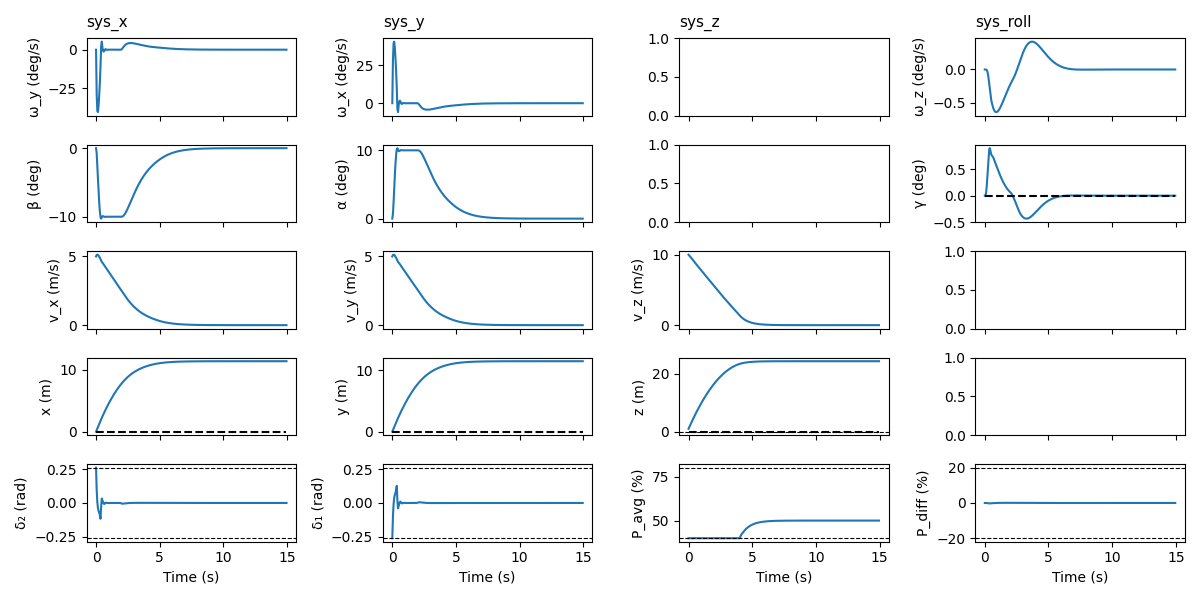

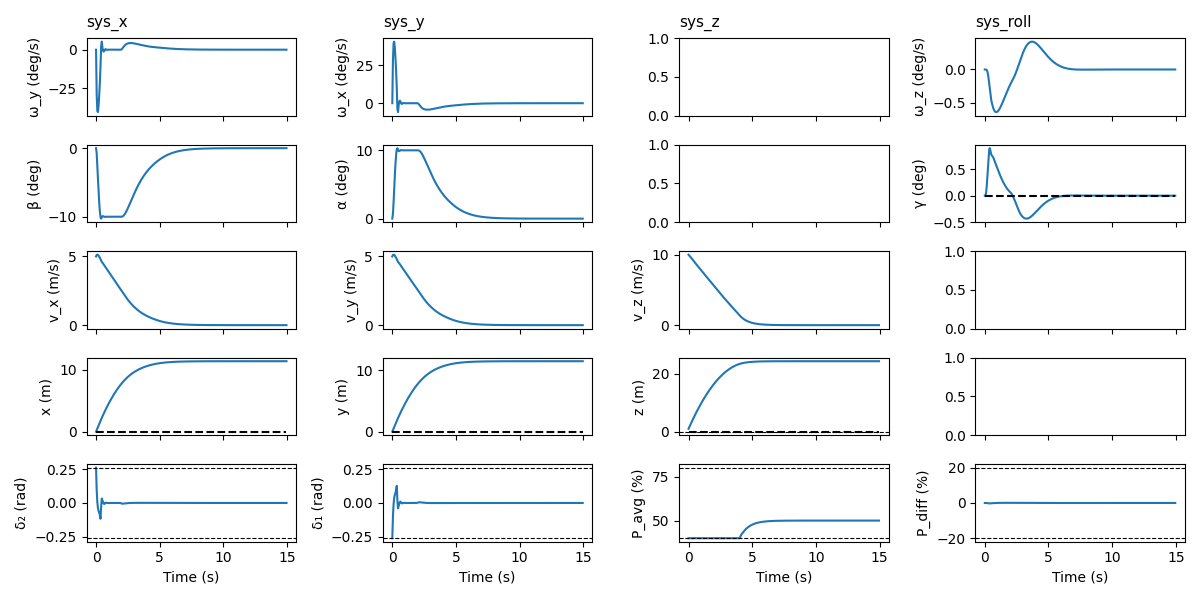

In [4]:
# Plots of the offset free tracking states and inputs
from src.vel_rocket_vis import plot_static_states_inputs
import matplotlib.pyplot as plt

T = t_cl[:-1]
X = x_cl[:, :-1]
U = u_cl
ref = ref[:,:-1]

plot_static_states_inputs(T, X, U, ref)
# plt.savefig("Non_lin_closedloop_states_inputs.pdf", bbox_inches="tight")
plt.show()

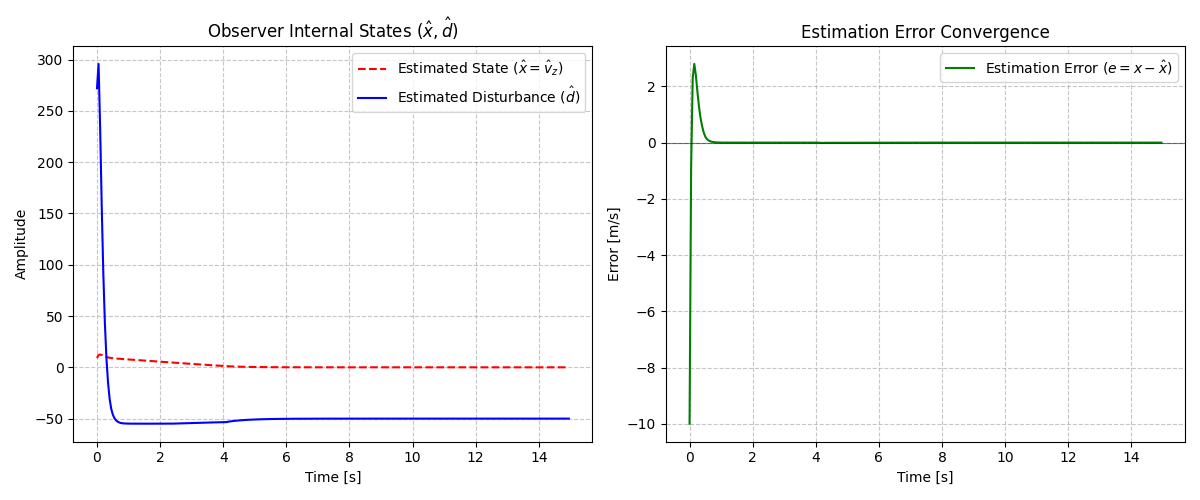

In [5]:
# Plots for the estimated states and disturbance, as well as errors
import matplotlib.pyplot as plt
import numpy as np

def plot_observer_complete(t_vector, x_estimated, x_error, d_estimated):
    """
    Plots the estimated state, estimated disturbance, and estimation error.
    Uses raw strings (r'') to avoid SyntaxWarnings with LaTeX backslashes.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # --- Subplot 1: Estimator Internal States ---
    # Using r'...' ensures \hat is treated as LaTeX, not a Python escape sequence
    ax1.plot(t_vector, x_estimated, 'r--', linewidth=1.5, label=r'Estimated State ($\hat{x} = \hat{v}_z$)')
    ax1.plot(t_vector, d_estimated, 'b-', linewidth=1.5, label=r'Estimated Disturbance ($\hat{d}$)')
    ax1.set_title(r"Observer Internal States ($\hat{x}, \hat{d}$)", fontsize=12)
    ax1.set_xlabel("Time [s]", fontsize=10)
    ax1.set_ylabel("Amplitude", fontsize=10)
    ax1.legend(loc='best')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # --- Subplot 2: Estimation Error (Innovation) ---
    ax2.plot(t_vector, x_error, 'g-', linewidth=1.5, label=r'Estimation Error ($e = x - \hat{x}$)')
    ax2.axhline(0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
    
    ax2.set_title("Estimation Error Convergence", fontsize=12)
    ax2.set_xlabel("Time [s]", fontsize=10)
    ax2.set_ylabel("Error [m/s]", fontsize=10)
    ax2.legend(loc='best')
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    # plt.savefig("Obs_n_Estimation_Error_Conv.pdf", bbox_inches="tight")
    plt.show()

plot_observer_complete(t_cl[:-1],np.array(mpc.mpc_z.x_hat_history),np.array(mpc.mpc_z.estimation_error_history),np.array(mpc.mpc_z.d_history)) 


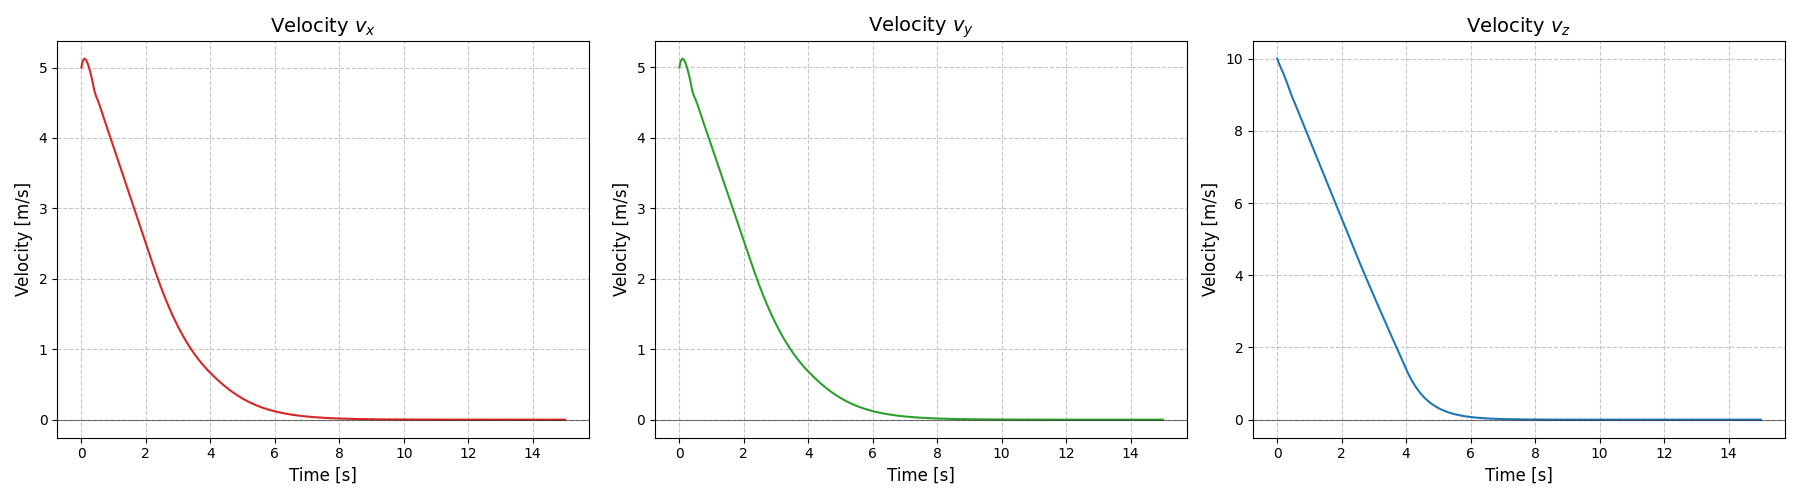

In [6]:
# Plots of the closed-loop velocities v_x and v_y with offset free-tracking
def plot_velocities_side_by_side(t_vector, x_trajectory):
    """
    Plots vx, vy, and vz velocities side-by-side.
    
    Args:
        t_vector: Time vector from simulation (t_cl)
        x_trajectory: Full state trajectory (12 x N matrix)
    """
    # Define indices for velocities: vx=6, vy=7, vz=8
    v_indices = [6, 7, 8]
    v_names = [r'$v_x$', r'$v_y$', r'$v_z$']
    v_colors = ['tab:red', 'tab:green', 'tab:blue']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

    for i, ax in enumerate(axes):
        idx = v_indices[i]
        ax.plot(t_vector, x_trajectory[idx, :], color=v_colors[i], linewidth=1.5)
        
        ax.set_title(f"Velocity {v_names[i]}", fontsize=14)
        ax.set_xlabel("Time [s]", fontsize=12)
        ax.set_ylabel("Velocity [m/s]", fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Add a horizontal line at 0 for reference
        ax.axhline(0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)

    plt.tight_layout()
    # plt.savefig("Vx_Vy_Vz.pdf", bbox_inches="tight")
    plt.show()

plot_velocities_side_by_side(t_cl, x_cl)